In the following notebook, I will be analyzing CPI statistics in San Francisco, Oakland, and Hayward. Raw data can be found [here](https://beta.bls.gov/dataViewer/view/timeseries/CUURS49BSA0;jsessionid=453C5D62EA9972ADBC9CCDA260A3AA7E)

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Set notebook preferences
plt.style.use('ggplot')

In [34]:
#Read in data from local machine
%cd /home/kishen/Documents/SFBrigade/datasci-police-budget/data/raw_data

raw_df= pd.read_csv('CPI_UrbanConsumers_SF_Oakland_Hayward.csv')

/home/kishen/Documents/SFBrigade/datasci-police-budget/data/raw_data


In [35]:
display(raw_df.shape)
raw_df.head()

(114, 5)

,Series ID,Year,Period,Label,Value
0,CUURS49BSA0,2000,M02,2000 Feb,176.5
1,CUURS49BSA0,2000,M04,2000 Apr,178.7
2,CUURS49BSA0,2000,M06,2000 Jun,179.1
3,CUURS49BSA0,2000,M08,2000 Aug,181.7
4,CUURS49BSA0,2000,M10,2000 Oct,183.4


**Data Cleaning**

In [37]:
#Drop redundant cols
clean_df= raw_df.drop(['Series ID','Period','Year'], axis= 1)

#Clean up dataframe
clean_df[['year','month']]= clean_df['Label'].str.split(' ', 1, expand=True)
clean_df.drop('Label', axis=1, inplace=True)

clean_df

,Value,year,month
0,176.500,2000,Feb
1,178.700,2000,Apr
2,179.100,2000,Jun
3,181.700,2000,Aug
4,183.400,2000,Oct
...,...,...,...
109,283.422,2018,Apr
110,286.062,2018,Jun
111,287.664,2018,Aug
112,289.673,2018,Oct


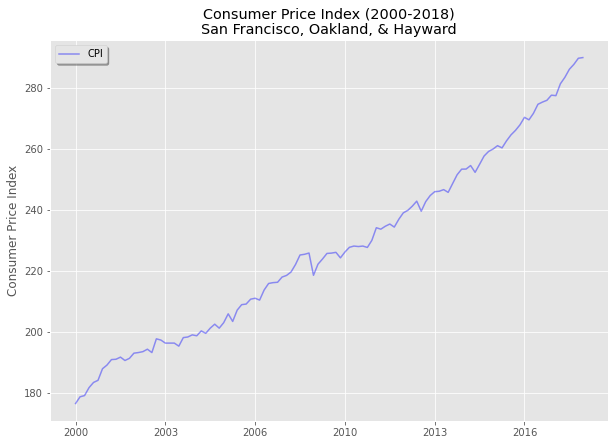

In [63]:
#CPI per 2 months
j= clean_df.plot(x='year', y='Value', figsize=(10,7),color= 'blue', alpha= .4,
           title= 'Consumer Price Index (2000-2018)\nSan Francisco, Oakland, & Hayward',
                label='CPI')

j.set_xlabel('')
j.set_ylabel('Consumer Price Index')
j.legend(shadow=True, loc= 'best')
